## C - Implement a text data analysis (also known as text mining) of the field "description" from instagram_posts.csv for descriptions written in English. Use appropriate visualizations and statistics to highlight the words (and probably the topics) provided for the users in that field.

In [9]:
import pandas as pd
import datatable as dt
import enchant

In [56]:
descriptions = pd.read_csv("instagram_posts.csv", delimiter='\t', dtype = {'description': 'string'}, usecols=['description'], chunksize=100000)

In [62]:
p = descriptions.get_chunk(100000)

In [63]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 1000 to 100999
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  91902 non-null  string
dtypes: string(1)
memory usage: 781.4 KB


In [91]:


def count_word(arr):
    d = enchant.Dict("en_US")
    counts = dict()
    for description in arr.iterrows():
        for word in description[1].to_string().split():
            #check if the word is in english
            if d.check(word) and len(word) > 2:
                if word in counts:
                    counts[word] += 1
                else:
                    counts[word] = 1
    return counts


In [92]:
dic = count_word(p)

In [93]:
dic.pop('description')

100003

In [95]:
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


In [96]:
### Clean the dictionary

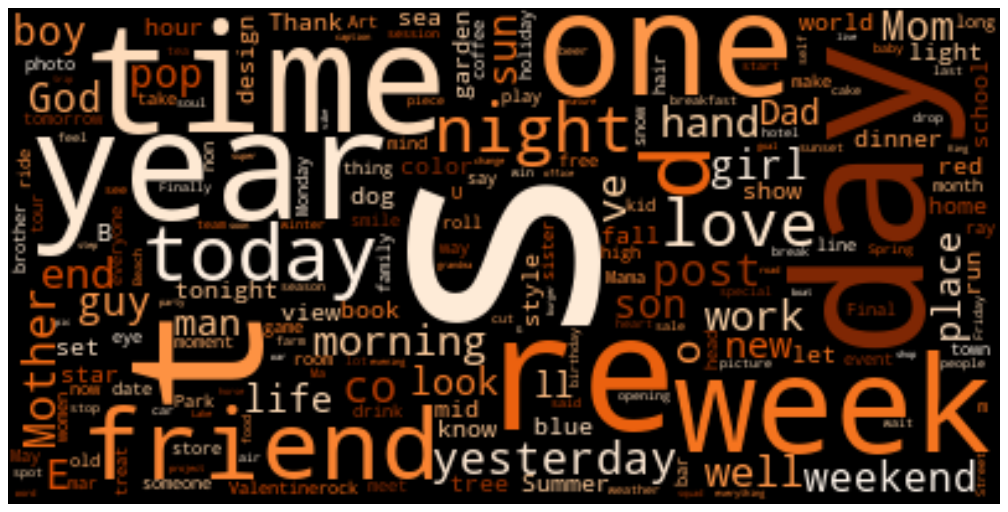

In [97]:

figure(figsize=(16, 12), dpi=80)
text = " ".join([(k + " ") for k,v in dic.items()])

# Generate a word cloud image
wordcloud = WordCloud(colormap="Oranges").generate(text)


# Display the generated image:
# the matplotlib way
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
